# Create figures for atmospheric forcing

Started 2023-04-21

by Eva Lieungh, adapted from [LSP notebook](https://github.com/NorESMhub/noresm-land-sites-platform/tree/main/notebooks/plot_input_data). 

Plots to visualize some of the model inputs for atmospheric forcing, i.e., the dataset providing climatic observations driving model processes such as photosynthesis or evaporation.

Print the current working directory to know where to define paths from:

In [1]:
%%bash
pwd

/mnt/c/Users/evaler/OneDrive - Universitetet i Oslo/Eva/PHD/FATES_INCLINE/src/plot_data


In [2]:
from pathlib import Path

# Add full case names
gswp3_surf = "alp4-3000-surfdatmod"
cosmo_warm = "ALP4_cosmorea_warmed"

# Path to input data. Only change this line if you renamed the folder or moved it from the default location!
inputdata_path = Path(f"../../results/{gswp3_surf}/input")
cosmo_warm_path = Path(f"../../data/{cosmo_warm}")

In [3]:
# Enter the case's site code
site_code = "ALP4"

Specify custom start and end dates for plotting a short time period with the original temporal resolution, i.e. in 3 hourly timesteps. It should generally be a year or less to maintain readability. Must be within the time range of the data, 1901-01-01 to 2013-12-31 for GSWP3, 1995-01-01 to 2018-12-31 for COSMOREA.

In [4]:
subset_time_start = '2013-01-01'  # Format: YYYY-MM-DD
subset_time_end = '2013-12-31'  # Format: YYYY-MM-DD

Import some more libraries needed furhter down

In [5]:
import matplotlib.pyplot as plt
import xarray as xr
import time
import glob

In [6]:
# Root path to surface data
atm_forcing_data_path = Path(f"{cosmo_warm_path}/datmdata/")

In [9]:
# open and combine all the monthly atmospheric NetCDF files present in the folder into an xarray dataset
# Could take up to 10 minutes for GSWP3
start_time = time.time()

# read COSMO-REA6 data
climate_data_file_paths = glob.glob(f"{atm_forcing_data_path}/clm1pt_*.nc")

# read GSWP3 data
# climate_data_file_paths = glob.glob(f"{atm_forcing_data_path}/*TPQWL*.nc") \
# + glob.glob(f"{atm_forcing_data_path}/*Solr*.nc") \
# + glob.glob(f"{atm_forcing_data_path}/*Prec*.nc")

atm_forcing_data = xr.open_mfdataset(climate_data_file_paths, 
                                     decode_times=True
                                    )
print(f"--- Time it took to read the data: {round(float(time.time() - start_time), 3)} seconds ---")

--- Time it took to read the data: 18.285 seconds ---


In [10]:
# Create case folder for output plots if necessary
out_dir_path = cosmo_warm_path / "plots"

if not out_dir_path.is_dir():
    out_dir_path.mkdir(parents=True, exist_ok=True)

In [11]:
# Set general plotting options
DPI = 150
TICK_LABEL_FONT_SIZE = 12
AX_LABEL_FONT_SIZE = 14
TITLE_FONT_SIZE = 16

## Full dataset period

In [12]:
# Print dataset info
atm_forcing_data

<xarray.Dataset>
Dimensions:      (time: 70080, scalar: 1, lat: 1, lon: 1)
Coordinates:
  * time         (time) object 1995-01-01 01:00:00 ... 2018-12-31 22:00:00
Dimensions without coordinates: scalar, lat, lon
Data variables: (12/18)
    EDGEW        (time, scalar) float32 dask.array<chunksize=(248, 1), meta=np.ndarray>
    EDGEE        (time, scalar) float32 dask.array<chunksize=(248, 1), meta=np.ndarray>
    EDGES        (time, scalar) float32 dask.array<chunksize=(248, 1), meta=np.ndarray>
    EDGEN        (time, scalar) float32 dask.array<chunksize=(248, 1), meta=np.ndarray>
    LONGXY       (time, lat, lon) float32 dask.array<chunksize=(248, 1, 1), meta=np.ndarray>
    LATIXY       (time, lat, lon) float32 dask.array<chunksize=(248, 1, 1), meta=np.ndarray>
    ...           ...
    PRECTmms     (time, lat, lon) float32 dask.array<chunksize=(248, 1, 1), meta=np.ndarray>
    TBOT         (time, lat, lon) float32 dask.array<chunksize=(248, 1, 1), meta=np.ndarray>
    WIND         (time, lat, lon) float32 dask.array<chunksize=(248, 1, 1), meta=np.ndarray>
    PSRF         (time, lat, lon) float32 dask.array<chunksize=(248, 1, 1), meta=np.ndarray>
    SHUM         (time, lat, lon) float32 dask.array<chunksize=(248, 1, 1), meta=np.ndarray>
    FLDS         (time, lat, lon) float32 dask.array<chunksize=(248, 1, 1), meta=np.ndarray>
Attributes:
    creation_date:  ti 21.2.2023 10.20.38 +0100
    history:        Wed Apr 19 11:45:22 2023: ncatted -O -a calendar,time,o,c...
    title:          CLM single point datm input data
    conventions:    CF-1.0
    case_title:     COSMOREA6: SEEDCLIM
    NCO:            netCDF Operators version 5.0.6 (Homepage = http://nco.sf....

#### Annual temperature, precipitation, and total incident solar radiation
The code cells below use `xarray` and `matplotlib` libraries for input data wrangling and plotting.

In [13]:
# Temperature, resample to annual mean, convert from K to °C
temp_mean_year = atm_forcing_data["TBOT"].resample(time='1Y').mean() - 273.15

# Precipitation, convert from [mm H2O / sec] to total (3h=10800s model time step), resample to annual sum
precip_total_year = (atm_forcing_data["PRECTmms"] * 10800).resample(time='1Y').sum()

# Radiation, resample to annual mean
radiation_mean_year = atm_forcing_data["FLDS"].resample(time='1Y').mean()

TypeError: float() argument must be a string or a real number, not 'cftime._cftime.DatetimeNoLeap'

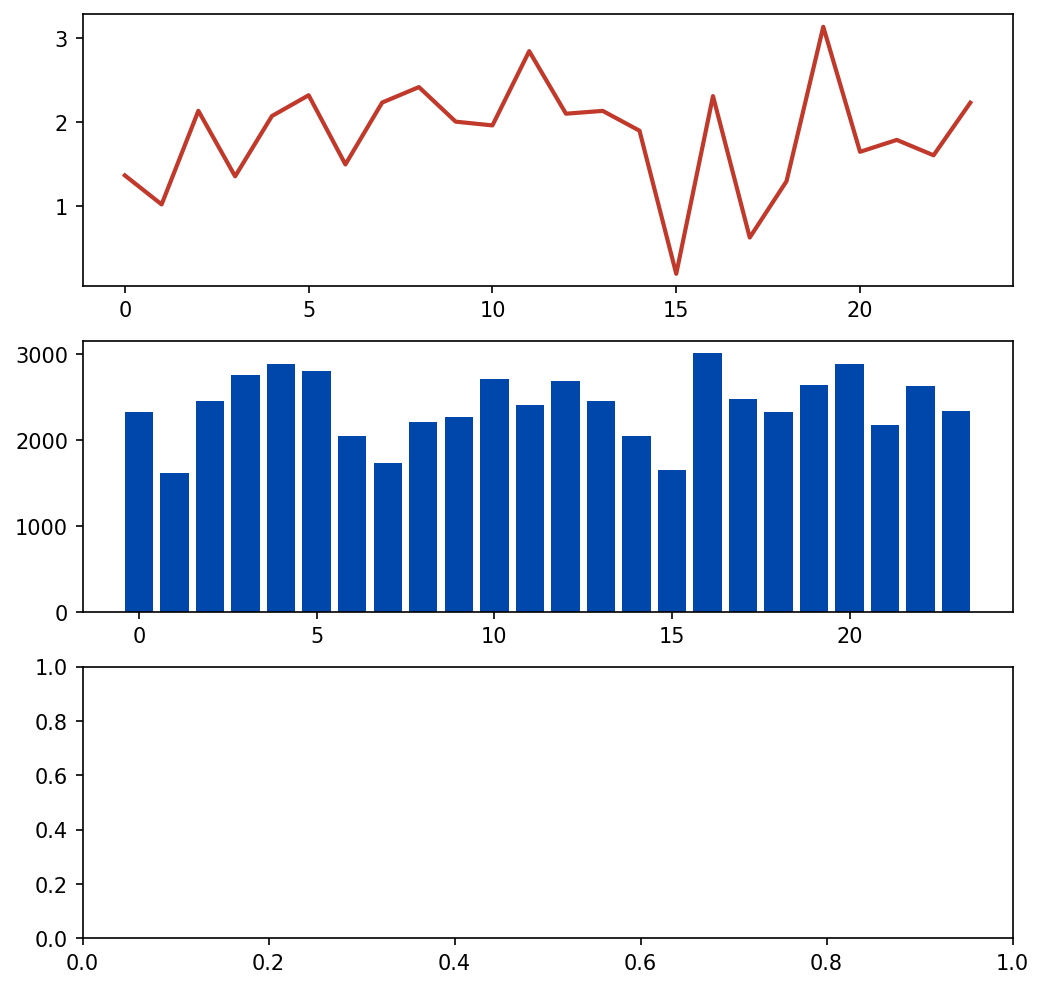

In [14]:
# Instantiate plot, one subplot for each variable
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1,
                                    figsize=(8, 8),
                                    dpi=DPI)

ax1.plot(range(len(temp_mean_year.time)),
         temp_mean_year.values.flatten(),
         color="#C0392B",
         linewidth=2,
         label="Annual mean temperature [°C]"
       )

ax2.bar(x=range(len(precip_total_year.time)),
        height=precip_total_year.values.flatten(),
        color="#0047AB",
        label="Total precipitation"
       )

ax3.plot(radiation_mean_year.time,
         radiation_mean_year.values.flatten(),
         color="#28282B",
         linewidth=2,
         label="Annual mean incident solar radiation [W/m²]"
        )

# Disable x axes for subplots 1 and 2
ax1.get_xaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)

# Other plot layout settings
ax1.set_title(f"{site_code}: GSWP3 forcing (1901-2014)", size=TITLE_FONT_SIZE)

ax1.set_ylabel("Annual mean 2m air\ntemperature [°C]", fontsize=AX_LABEL_FONT_SIZE)
ax2.set_ylabel("Annual total\nprecipitation [mm]", fontsize=AX_LABEL_FONT_SIZE)
ax3.set_ylabel("Annual mean incident\nsolar radiation [W/m²]", fontsize=AX_LABEL_FONT_SIZE)
ax3.set_xlabel("Year", fontsize=AX_LABEL_FONT_SIZE)

ax1.tick_params(axis='y', which='major', labelsize=TICK_LABEL_FONT_SIZE)
ax2.tick_params(axis='y', which='major', labelsize=TICK_LABEL_FONT_SIZE)
ax3.tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONT_SIZE)

# Save figure
fig.tight_layout()
fig.savefig(fname=f"{out_dir_path}/atmosphere_yearly_temp_precip_rad.png", format='png')

---
## Short period

In [12]:
atm_forcing_data

<xarray.Dataset>
Dimensions:   (lon: 1, lat: 1, time: 665760, scalar: 1)
Coordinates:
  * lon       (lon) float32 227.8
  * lat       (lat) float32 62.25
  * time      (time) object 1901-01-01 00:00:00 ... 2014-12-31 22:30:00
Dimensions without coordinates: scalar
Data variables: (12/13)
    LONGXY    (time, lat, lon) float32 dask.array<chunksize=(496, 1, 1), meta=np.ndarray>
    LATIXY    (time, lat, lon) float32 dask.array<chunksize=(496, 1, 1), meta=np.ndarray>
    EDGEE     (time, scalar, lat, lon) float32 dask.array<chunksize=(496, 1, 1, 1), meta=np.ndarray>
    EDGEW     (time, scalar, lat, lon) float32 dask.array<chunksize=(496, 1, 1, 1), meta=np.ndarray>
    EDGES     (time, scalar, lat, lon) float32 dask.array<chunksize=(496, 1, 1, 1), meta=np.ndarray>
    EDGEN     (time, scalar, lat, lon) float32 dask.array<chunksize=(496, 1, 1, 1), meta=np.ndarray>
    ...        ...
    TBOT      (time, lat, lon) float32 dask.array<chunksize=(497, 1, 1), meta=np.ndarray>
    WIND      (time, lat, lon) float32 dask.array<chunksize=(497, 1, 1), meta=np.ndarray>
    QBOT      (time, lat, lon) float32 dask.array<chunksize=(497, 1, 1), meta=np.ndarray>
    FLDS      (time, lat, lon) float32 dask.array<chunksize=(497, 1, 1), meta=np.ndarray>
    FSDS      (time, lat, lon) float32 dask.array<chunksize=(496, 1, 1), meta=np.ndarray>
    PRECTmms  (time, lat, lon) float32 dask.array<chunksize=(497, 1, 1), meta=np.ndarray>
Attributes:
    case_title:    GSWP3 3-Hourly Atmospheric Forcing: Temperature, Pressure,...
    Created_on:    2022-10-31
    Created_by:    kavehka
    Created_with:  ./subset_data -- 97f34c975
    Created_from:  /cluster/shared/noresm/inputdata/atm/datm7/atm_forcing.dat...

### Temperature, precipitation, total radiation, longwave radiation, humidity, wind, atm. pressure 

In [13]:
atm_forcing_subset = atm_forcing_data.sel(
    time=slice(subset_time_start, subset_time_end)
)
atm_forcing_subset

<xarray.Dataset>
Dimensions:   (lon: 1, lat: 1, time: 5840, scalar: 1)
Coordinates:
  * lon       (lon) float32 227.8
  * lat       (lat) float32 62.25
  * time      (time) object 2013-01-01 00:00:00 ... 2013-12-31 22:30:00
Dimensions without coordinates: scalar
Data variables: (12/13)
    LONGXY    (time, lat, lon) float32 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    LATIXY    (time, lat, lon) float32 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    EDGEE     (time, scalar, lat, lon) float32 dask.array<chunksize=(1, 1, 1, 1), meta=np.ndarray>
    EDGEW     (time, scalar, lat, lon) float32 dask.array<chunksize=(1, 1, 1, 1), meta=np.ndarray>
    EDGES     (time, scalar, lat, lon) float32 dask.array<chunksize=(1, 1, 1, 1), meta=np.ndarray>
    EDGEN     (time, scalar, lat, lon) float32 dask.array<chunksize=(1, 1, 1, 1), meta=np.ndarray>
    ...        ...
    TBOT      (time, lat, lon) float32 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    WIND      (time, lat, lon) float32 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    QBOT      (time, lat, lon) float32 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    FLDS      (time, lat, lon) float32 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    FSDS      (time, lat, lon) float32 dask.array<chunksize=(496, 1, 1), meta=np.ndarray>
    PRECTmms  (time, lat, lon) float32 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
Attributes:
    case_title:    GSWP3 3-Hourly Atmospheric Forcing: Temperature, Pressure,...
    Created_on:    2022-10-31
    Created_by:    kavehka
    Created_with:  ./subset_data -- 97f34c975
    Created_from:  /cluster/shared/noresm/inputdata/atm/datm7/atm_forcing.dat...

In [14]:
variable_list = []

# Temperature, convert from K to °C
temp_subset = (atm_forcing_subset["TBOT"] - 273.15).dropna(dim="time")
variable_list.append(temp_subset)

# Precipitation, convert from [mm H2O / sec] to total [mm] (data temp. resolution: 3h=10800s), calculate cumulative sum
precip_subset = (atm_forcing_subset["PRECTmms"] * 10800).cumsum().dropna(dim="time")
variable_list.append(precip_subset)

# Total incident radiation
radation_total_subset = atm_forcing_subset["FSDS"].dropna(dim="time")
variable_list.append(radation_total_subset)

# Incident longwave radiation
radation_longwave_subset = atm_forcing_subset["FLDS"].dropna(dim="time")
variable_list.append(radation_longwave_subset)

# Specific humidity
humidity_subset = atm_forcing_subset["QBOT"].dropna(dim="time")
variable_list.append(humidity_subset)

# Wind speed
wind_subset = atm_forcing_subset["WIND"].dropna(dim="time")
variable_list.append(wind_subset)

# Atm. pressure, convert to hPa
pressure_subset = (atm_forcing_subset["PSRF"] * 0.01).dropna(dim="time")
variable_list.append(pressure_subset)

In [15]:
# Label dictionary
subset_plot_dict = {
    "TBOT": {
        "y_axis": "2m air temperature",
        "unit": "[°C]",
        "color": "#C0392B",
    },
    "PRECTmms": {
        "y_axis": "Cumulative precipitation",
        "unit": "[mm]",
        "color": "#0047AB",
    },
    "FSDS": {
        "y_axis": "Total incident solar radiation",
        "unit": "[W/m²]",
        "color": "#28282B",
    },
    "FLDS": {
        "y_axis": "Incident longwave radiation",
        "unit": "[W/m²]",
        "color": "#FE5654",
    },
    "QBOT": {
        "y_axis": "2m specific humidity",
        "unit": "[kg/kg]",
        "color": "#8EA9F6",
    },
    "WIND": {
        "y_axis": "2m wind speed",
        "unit": "[m/s]",
        "color": "#F00BF3",
    },
    "PSRF": {
        "y_axis": "Surface pressure",
        "unit": "[hPa]",
        "color": "#6B6B6B",
    },
}

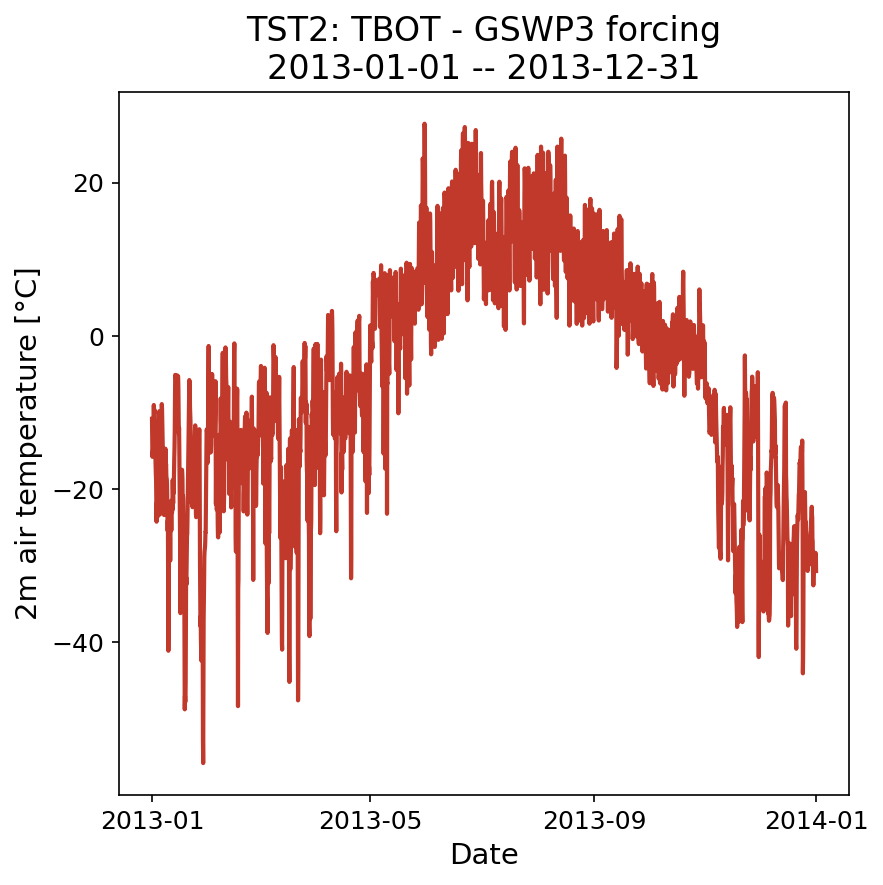

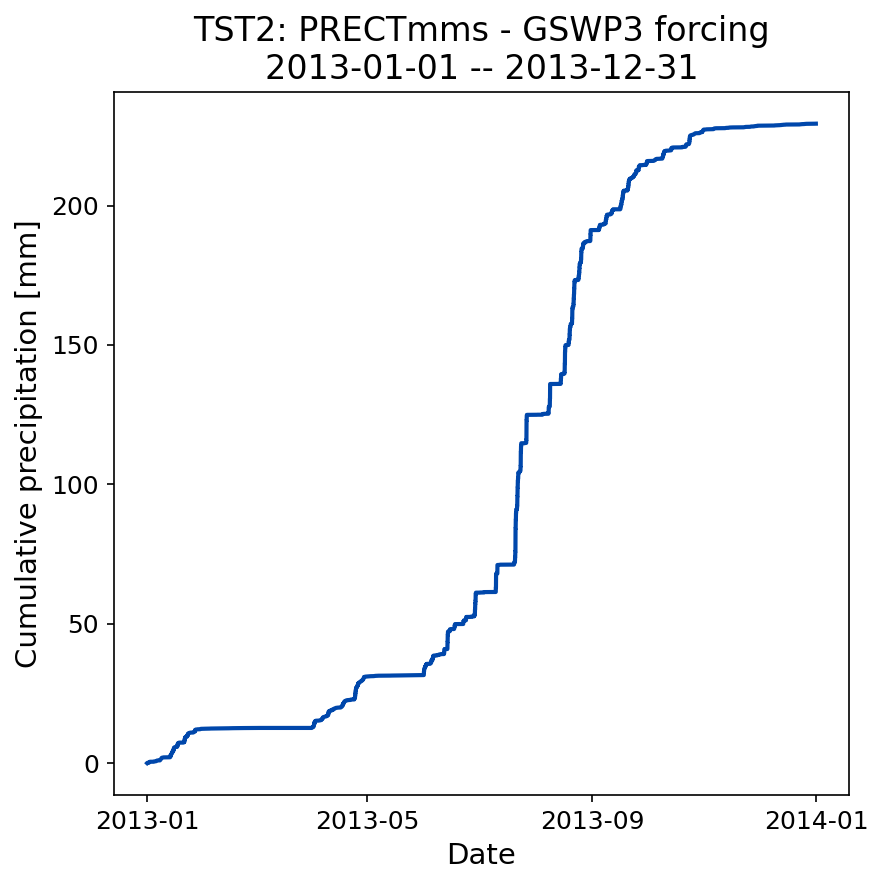

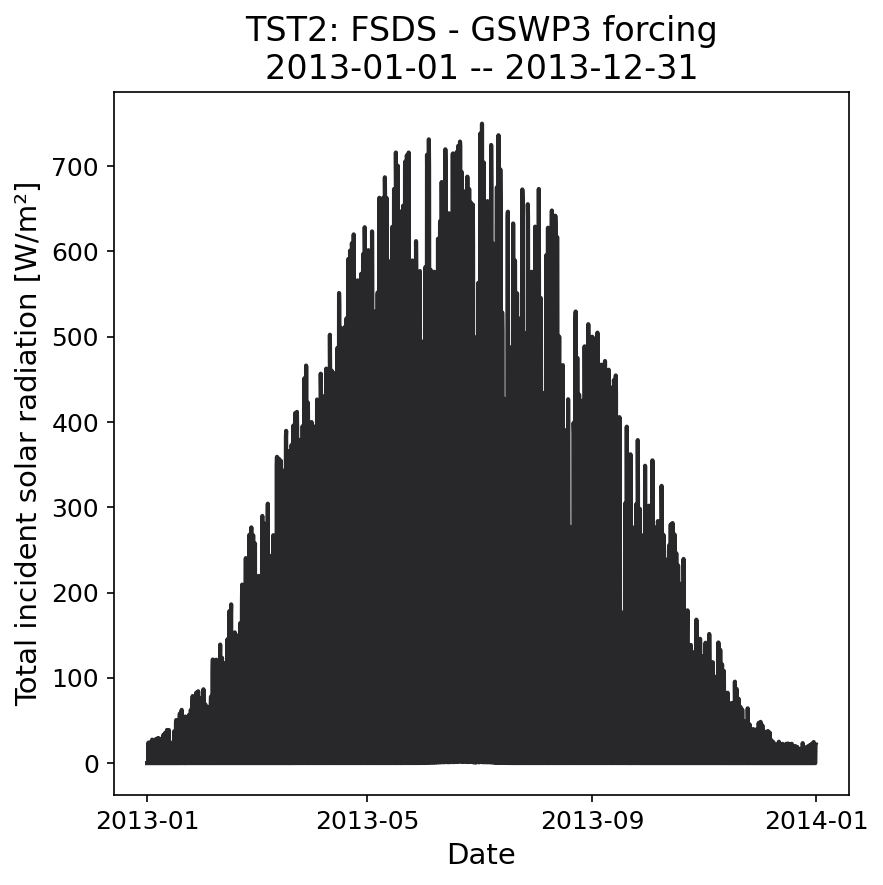

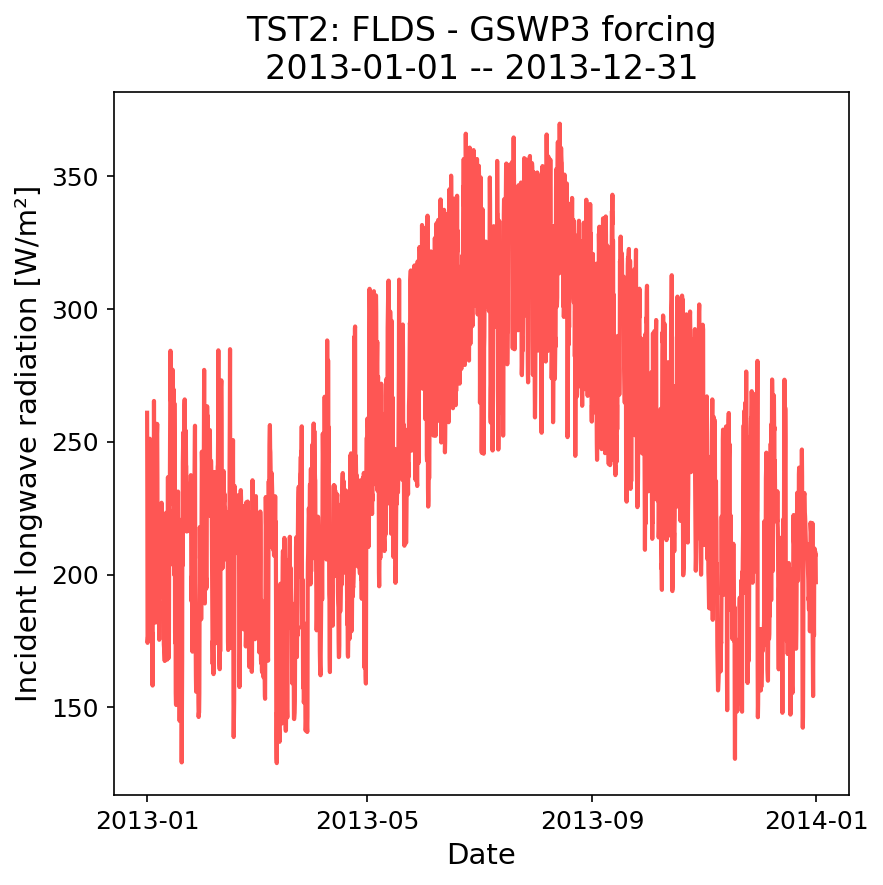

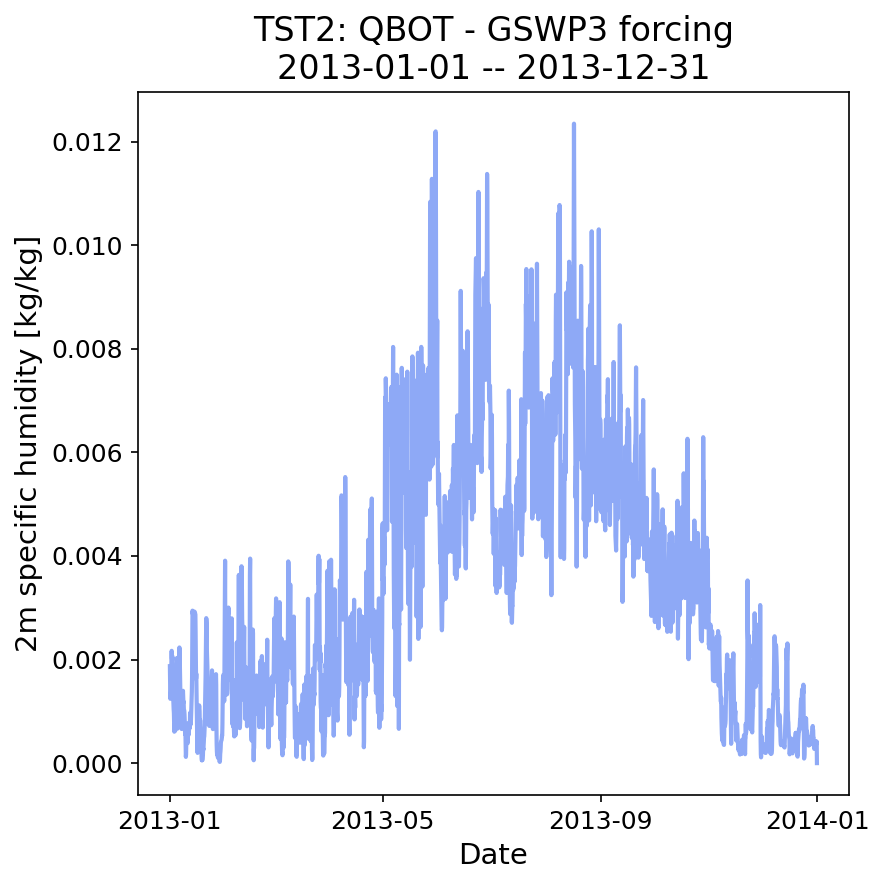

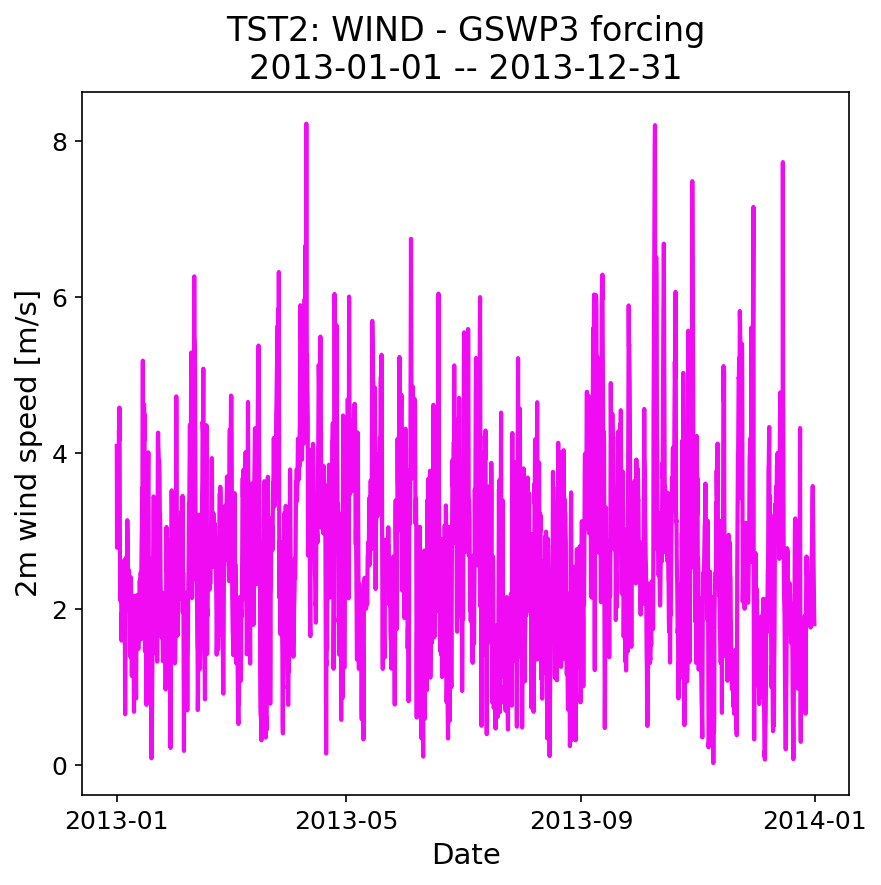

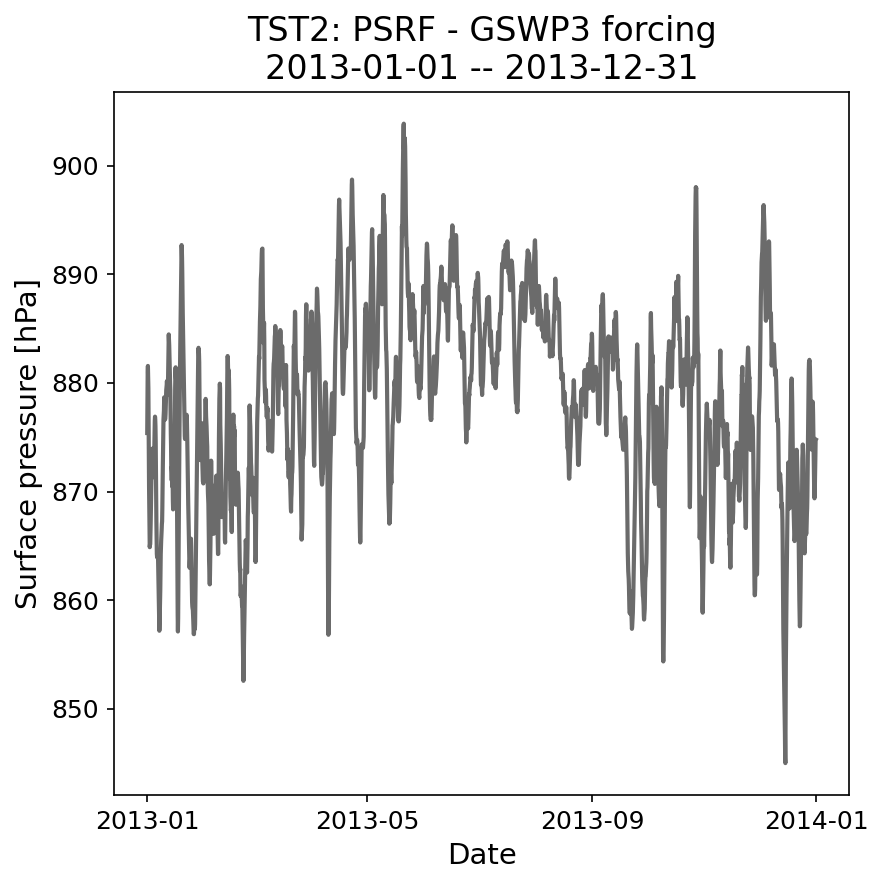

In [16]:
# Create plots for each variable
for variable in variable_list:
    
    # Get plot settings for current variable
    current_var_dict = subset_plot_dict.get(variable.name)
    
    # Instantiate plot
    fig, ax = plt.subplots(figsize=(6, 6), dpi=DPI)

    ax.plot(variable.time,
            variable.values.flatten(),
            color=current_var_dict.get('color'),
            linewidth=2,
           )
    
    # Other plot layout settings
    ax.set_title(f"{site_code}: {variable.name} - GSWP3 forcing\n{subset_time_start} -- {subset_time_end}", size=TITLE_FONT_SIZE)

    ax.set_ylabel(current_var_dict.get('y_axis') + " " + current_var_dict.get('unit'),
                  fontsize=AX_LABEL_FONT_SIZE)
    ax.set_xlabel("Date", fontsize=AX_LABEL_FONT_SIZE)

    ax.tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONT_SIZE)

    # Save figure
    fig.tight_layout()
    fig.savefig(fname=f"{out_dir_path}/atmosphere_{variable.name}_{subset_time_start}_to_{subset_time_end}.png", format='png')